# Agent-Based Modelling

### _Shreya Raghavendra (13756877), Boyan Mihaylov (15067602), Eline van de Lagemaat (11892900), Sofia Tavitian (14824248), Chayenne Olumuyiwa (12055662)_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import model as mdl
import agent as agt
import visualisation as vis
import sensitivity_analysis as sa

In [160]:
import warnings
warnings.filterwarnings("ignore")

## 1. Model Setup

In [63]:
reload(mdl)
reload(agt)
reload(vis)

reload(mdl)
reload(agt)
reload(vis)

<module 'visualisation' from 'd:\\GitHub\\agent-based-modelling\\Project\\visualisation.py'>

d:\GitHub\agent-based-modelling\Project\model.py:45: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:49: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


10
[[ 9  9]
 [ 2  9]
 [ 2 12]
 [12 16]
 [ 8  2]
 [15  8]
 [18 14]
 [14  5]
 [14  3]
 [14  2]]
1
1
1
1
1
1
3
1
3
3
7
[[ 7  9]
 [ 3 15]
 [15 12]
 [ 6 17]
 [ 9 13]
 [ 7 16]
 [ 6 15]]
2
2
2
1
2
3
2
6
[[ 0 11]
 [ 6 11]
 [ 7  5]
 [16 18]
 [ 9 11]
 [17 14]]
3
1
1
1
3
1
5
[[15  9]
 [13  7]
 [ 5  9]
 [13  8]
 [11 12]]
2
1
1
1
3
4
[[14 11]
 [19  3]
 [ 1 14]
 [ 1 11]]
1
3
2
1
4
[[15 15]
 [ 5 12]
 [ 4 16]
 [ 0  0]]
1
3
1
3
4
[[14 14]
 [19  3]
 [ 6 14]
 [15  2]]
2
4
1
1
4
[[16  2]
 [17 15]
 [ 9  1]
 [18  7]]
2
1
1
1
4
[[10 12]
 [ 6  7]
 [ 4 14]
 [12  9]]
1
1
2
3
4
[[ 9  0]
 [ 7 11]
 [10  1]
 [15 14]]
3
1
1
1
4
[[16  7]
 [ 8  2]
 [ 8 13]
 [18 16]]
4
3
3
3
4
[[ 5 15]
 [ 3 14]
 [17 15]
 [13 14]]
1
2
3
2
4
[[10 17]
 [ 0 18]
 [ 7 16]
 [13 16]]
2
2
5
2
4
[[10  5]
 [19 15]
 [ 9 13]
 [ 5 10]]
4
3
4
2
4
[[7 2]
 [5 1]
 [5 8]
 [0 0]]
2
3
1
4
4
[[ 7  9]
 [ 7  7]
 [ 2  8]
 [18 12]]
2
2
2
2
4
[[ 8  3]
 [ 0 16]
 [ 0 10]
 [19  6]]
4
1
1
2
3
[[16 18]
 [14 10]
 [19  5]]
4
5
5
3
[[10 15]
 [ 8  7]
 [11  7]]
1
4
5
3
[[

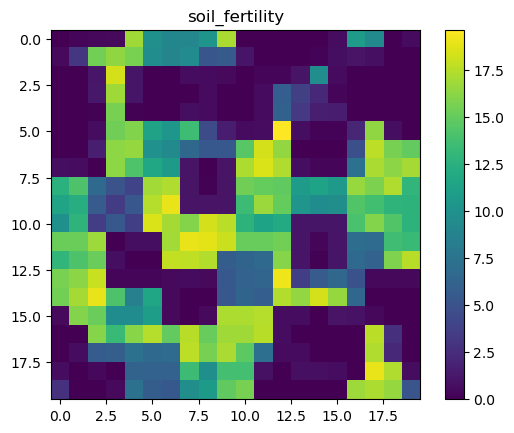

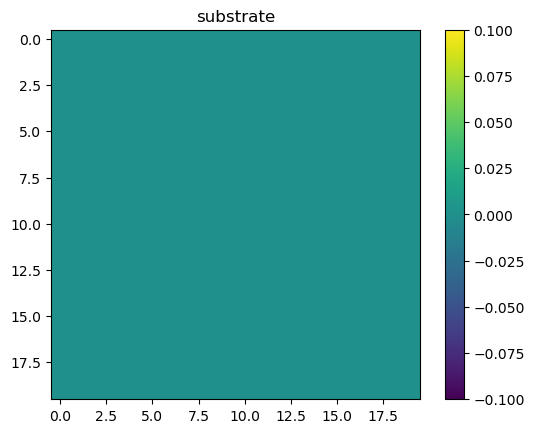

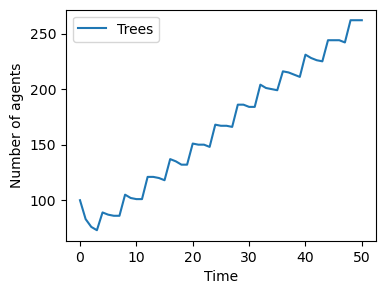

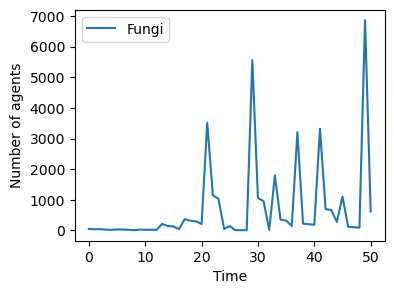

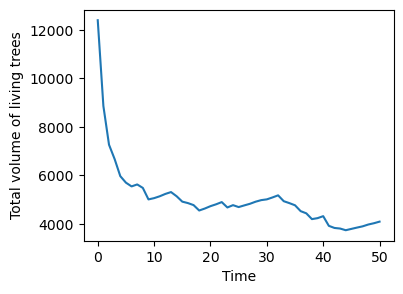

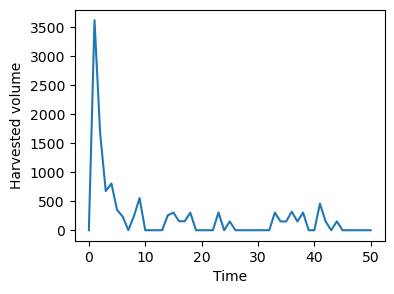

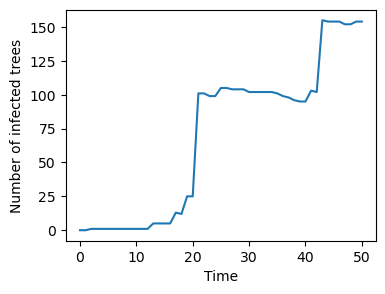

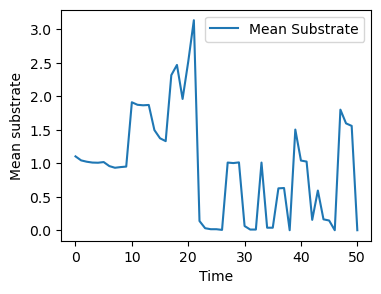

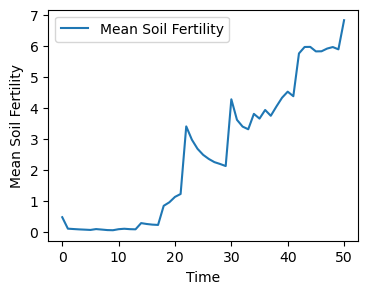

In [68]:
%matplotlib inline

width = 20
height = 20
n_init_trees = 100
n_init_fungi = 50
harvest_params = [150,0.5,0.5]
fert_comp_ratio = 0.5
model = mdl.Forest(width, height, n_init_trees, n_init_fungi, harvest_params, fert_comp_ratio)
model.run_model(n_steps=50)

vis.plot_property_layer(model, "soil_fertility")
vis.plot_property_layer(model, "substrate")

data = model.datacollector.get_model_vars_dataframe()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Trees"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Fungi"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of agents')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Living Trees Total Volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Total volume of living trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Harvested volume"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Harvested volume')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data["Infected Trees"].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Number of infected trees')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Substrate"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean substrate')
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
data[["Mean Soil Fertility"]].plot(ax=ax)
ax.set(xlabel='Time', ylabel='Mean Soil Fertility')
plt.show()

In [51]:
reload(vis)
reload(agt)
reload(mdl)

reload(vis)
reload(agt)
reload(mdl)

<module 'model' from 'd:\\GitHub\\agent-based-modelling\\Project\\model.py'>

In [52]:
model_params = {
    "n_init_trees": {
        "type": "SliderInt",
        "value": 100,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "n_init_fungi": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 20,
    "height": 20,
    "harvest_params": [150,4,0.5],
    "fert_comp_ratio": 0.5,
    "top_n_sites_percent": 0.01
}

page = vis.create_jupyter_viz(mdl.Forest, model_params, measures=["Trees", "Fungi", "Living Trees Total Volume", "Harvested volume",
                                                                  "Infected Trees", "Mean Substrate", "Mean Soil Fertility"])

page

Cannot show ipywidgets in text

## 2. Sensitivity Analysis

In [67]:
reload(mdl)
reload(sa)
reload(agt)

<module 'agent' from 'd:\\GitHub\\agent-based-modelling\\Project\\agent.py'>

In [68]:
problem = {
    'num_vars': 2,
    'names': ['n_init_trees', 'n_init_fungi'],
    'bounds': [[10, 100],
               [10, 100]]
}

data = sa.run_batches(mdl.Forest, problem , outputs=["Trees", "Fungi"], n_max_timesteps=100, n_replicates=2, n_distinct_samples=2)

Running a total of 12 samples.


  0%|          | 0/2 [00:00<?, ?it/s]

d:\GitHub\agent-based-modelling\Project\model.py:43: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('substrate', self.width, self.height, 1))
d:\GitHub\agent-based-modelling\Project\model.py:47: UserWarning: Default value 1 (int) might not be best suitable with dtype=float64.
  self.grid.add_property_layer(PropertyLayer('soil_fertility', self.width, self.height, 1))


[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 18, 'n_init_fungi': 52, 'Trees': 18, 'Fungi': 52, 'Living Trees Total Volume': 2811, 'Infected Trees': 0, 'Mean Substrate': 0.985, 'Substrate Variance': 0.6647750000000001, 'Mean Soil Fertility': 0.4860649142952211, 'Soil Fertility Variance': 0.08448441757800186, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 18, 'n_init_fungi': 52, 'Trees': 18, 'Fungi': 42, 'Living Trees Total Volume': 2833.8487621512627, 'Infected Trees': 0, 'Mean Substrate': 0.905, 'Substrate Variance': 0.680975, 'Mean Soil Fertility': 0.44095226022905465, 'Soil Fertility Variance': 0.19306624948988996, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 18, 'n_init_fungi': 52, 'Trees': 18, 'Fungi': 40, 'Living Trees Total Volume': 2855.353255284195, 'Infected Trees': 1, 'Mean Substrate': 0.8825, 'Substrate Variance': 0.7036937500000002, 'Mean Soil Fertility': 0.42311296154092565, 'Soil Fertility Var

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 52, 'Living Trees Total Volume': 7934, 'Infected Trees': 0, 'Mean Substrate': 0.955, 'Substrate Variance': 0.6579749999999999, 'Mean Soil Fertility': 0.5132622617420312, 'Soil Fertility Variance': 0.07617927200663663, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 41, 'Living Trees Total Volume': 7977.44910239431, 'Infected Trees': 0, 'Mean Substrate': 0.89, 'Substrate Variance': 0.6528999999999999, 'Mean Soil Fertility': 0.27672425097085895, 'Soil Fertility Variance': 0.14350738205864155, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 42, 'Living Trees Total Volume': 8016.358523896217, 'Infected Trees': 2, 'Mean Substrate': 0.8775, 'Substrate Variance': 0.67749375, 'Mean Soil Fertility': 0.22856304582424244, 'Soil Fertility Vari

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 69, 'Living Trees Total Volume': 2594, 'Infected Trees': 0, 'Mean Substrate': 1.0125, 'Substrate Variance': 0.65234375, 'Mean Soil Fertility': 0.4922376752124629, 'Soil Fertility Variance': 0.08002755996768204, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 54, 'Living Trees Total Volume': 2616.299849299568, 'Infected Trees': 0, 'Mean Substrate': 0.9, 'Substrate Variance': 0.655, 'Mean Soil Fertility': 0.4778192013773104, 'Soil Fertility Variance': 0.19585111957892173, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 56, 'Living Trees Total Volume': 2637.849531113206, 'Infected Trees': 3, 'Mean Substrate': 0.8525, 'Substrate Variance': 0.69574375, 'Mean Soil Fertility': 0.4780105137334641, 'Soil Fertility Variance': 0.3265447385418

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 69, 'Living Trees Total Volume': 2449, 'Infected Trees': 0, 'Mean Substrate': 1.005, 'Substrate Variance': 0.6399750000000001, 'Mean Soil Fertility': 0.49500723079662573, 'Soil Fertility Variance': 0.08179736040165231, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 51, 'Living Trees Total Volume': 2471.4579186518213, 'Infected Trees': 0, 'Mean Substrate': 0.8975, 'Substrate Variance': 0.63699375, 'Mean Soil Fertility': 0.49414217263801885, 'Soil Fertility Variance': 0.2063372065908174, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 18, 'n_init_fungi': 69, 'Trees': 18, 'Fungi': 53, 'Living Trees Total Volume': 2493.0903433342505, 'Infected Trees': 0, 'Mean Substrate': 0.8575, 'Substrate Variance': 0.66719375, 'Mean Soil Fertility': 0.4958098017452123, 'Soil Fertility Variance

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 52, 'Living Trees Total Volume': 6047, 'Infected Trees': 0, 'Mean Substrate': 1.0275, 'Substrate Variance': 0.66674375, 'Mean Soil Fertility': 0.5076666515660232, 'Soil Fertility Variance': 0.08030731491064863, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 45, 'Living Trees Total Volume': 6098.21001534159, 'Infected Trees': 0, 'Mean Substrate': 0.95, 'Substrate Variance': 0.6675, 'Mean Soil Fertility': 0.3520875964347489, 'Soil Fertility Variance': 0.17202964048827013, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 52, 'n_init_fungi': 52, 'Trees': 52, 'Fungi': 45, 'Living Trees Total Volume': 6146.685900249378, 'Infected Trees': 5, 'Mean Substrate': 0.9175, 'Substrate Variance': 0.7156937500000001, 'Mean Soil Fertility': 0.31516273088082253, 'Soil Fertility Variance': 0.265

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 52, 'n_init_fungi': 69, 'Trees': 52, 'Fungi': 69, 'Living Trees Total Volume': 7096, 'Infected Trees': 0, 'Mean Substrate': 1.055, 'Substrate Variance': 0.6469749999999999, 'Mean Soil Fertility': 0.47702346174707166, 'Soil Fertility Variance': 0.08055245257117077, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 52, 'n_init_fungi': 69, 'Trees': 52, 'Fungi': 54, 'Living Trees Total Volume': 7147.981863540923, 'Infected Trees': 0, 'Mean Substrate': 0.94, 'Substrate Variance': 0.6513999999999999, 'Mean Soil Fertility': 0.33729773352426096, 'Soil Fertility Variance': 0.23071925617342415, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 52, 'n_init_fungi': 69, 'Trees': 52, 'Fungi': 54, 'Living Trees Total Volume': 7196.073796886114, 'Infected Trees': 2, 'Mean Substrate': 0.9, 'Substrate Variance': 0.695, 'Mean Soil Fertility': 0.3138728582200638, 'Soil Fertility Variance': 

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 63, 'n_init_fungi': 97, 'Trees': 63, 'Fungi': 97, 'Living Trees Total Volume': 9053, 'Infected Trees': 0, 'Mean Substrate': 0.9625, 'Substrate Variance': 0.6410937500000001, 'Mean Soil Fertility': 0.5002733911813035, 'Soil Fertility Variance': 0.08640324814108431, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 63, 'n_init_fungi': 97, 'Trees': 63, 'Fungi': 75, 'Living Trees Total Volume': 9112.527872017527, 'Infected Trees': 0, 'Mean Substrate': 0.8275, 'Substrate Variance': 0.6577437500000001, 'Mean Soil Fertility': 0.3055096823670923, 'Soil Fertility Variance': 0.1845787160993943, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 63, 'n_init_fungi': 97, 'Trees': 62, 'Fungi': 53, 'Living Trees Total Volume': 8991.757583038383, 'Infected Trees': 1, 'Mean Substrate': 0.7975, 'Substrate Variance': 0.6914937500000002, 'Mean Soil Fertility': 0.24018956628376842, 'Soil Fert

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 97, 'Fungi': 97, 'Living Trees Total Volume': 13195, 'Infected Trees': 0, 'Mean Substrate': 1.07, 'Substrate Variance': 0.6500999999999999, 'Mean Soil Fertility': 0.5092486141941739, 'Soil Fertility Variance': 0.08571899121736835, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 94, 'Fungi': 85, 'Living Trees Total Volume': 12583.503535348218, 'Infected Trees': 0, 'Mean Substrate': 0.915, 'Substrate Variance': 0.667775, 'Mean Soil Fertility': 0.231883404976987, 'Soil Fertility Variance': 0.16182978495630215, 'Harvested volume': 682.3064581531112}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 94, 'Fungi': 86, 'Living Trees Total Volume': 12649.172454618458, 'Infected Trees': 12, 'Mean Substrate': 0.855, 'Substrate Variance': 0.7489750000000001, 'Mean Soil Fertility': 0.16941100890766037, 'Soi

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 63, 'Fungi': 24, 'Living Trees Total Volume': 9640, 'Infected Trees': 0, 'Mean Substrate': 1.0475, 'Substrate Variance': 0.67024375, 'Mean Soil Fertility': 0.5000931047702865, 'Soil Fertility Variance': 0.08492972006430284, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 63, 'Fungi': 21, 'Living Trees Total Volume': 9699.309559104933, 'Infected Trees': 0, 'Mean Substrate': 1.0225, 'Substrate Variance': 0.6919937500000001, 'Mean Soil Fertility': 0.19666396560445434, 'Soil Fertility Variance': 0.09876028097161167, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 63, 'Fungi': 15, 'Living Trees Total Volume': 9753.473602334885, 'Infected Trees': 1, 'Mean Substrate': 1.0175, 'Substrate Variance': 0.7271937499999999, 'Mean Soil Fertility': 0.15499822387023074, 'Soil Fertility 

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 63, 'Fungi': 24, 'Living Trees Total Volume': 9574, 'Infected Trees': 0, 'Mean Substrate': 0.9125, 'Substrate Variance': 0.66484375, 'Mean Soil Fertility': 0.5182076515624895, 'Soil Fertility Variance': 0.08216361513645896, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 61, 'Fungi': 19, 'Living Trees Total Volume': 9199.206846155259, 'Infected Trees': 0, 'Mean Substrate': 0.885, 'Substrate Variance': 0.6917750000000001, 'Mean Soil Fertility': 0.2043539704204881, 'Soil Fertility Variance': 0.10572922777082408, 'Harvested volume': 430.43007234262507}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 63, 'n_init_fungi': 24, 'Trees': 59, 'Fungi': 20, 'Living Trees Total Volume': 8963.918110299104, 'Infected Trees': 2, 'Mean Substrate': 1.6, 'Substrate Variance': 119.58999999999997, 'Mean Soil Fertility': 0.15243030623595255, 'Soi

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 97, 'Fungi': 97, 'Living Trees Total Volume': 14058, 'Infected Trees': 0, 'Mean Substrate': 1.0625, 'Substrate Variance': 0.67859375, 'Mean Soil Fertility': 0.5095896052306212, 'Soil Fertility Variance': 0.08416879352673962, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 95, 'Fungi': 80, 'Living Trees Total Volume': 13747.84543846837, 'Infected Trees': 0, 'Mean Substrate': 0.92, 'Substrate Variance': 0.6536000000000002, 'Mean Soil Fertility': 0.22585374248966494, 'Soil Fertility Variance': 0.16011199950606295, 'Harvested volume': 368.4292759688117}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 97, 'n_init_fungi': 97, 'Trees': 91, 'Fungi': 79, 'Living Trees Total Volume': 13014.444178085652, 'Infected Trees': 8, 'Mean Substrate': 1.015, 'Substrate Variance': 9.449774999999999, 'Mean Soil Fertility': 0.1860445360254964, 'So

  0%|          | 0/2 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_init_trees': 97, 'n_init_fungi': 24, 'Trees': 97, 'Fungi': 24, 'Living Trees Total Volume': 12617, 'Infected Trees': 0, 'Mean Substrate': 0.96, 'Substrate Variance': 0.6484000000000001, 'Mean Soil Fertility': 0.4901161988508676, 'Soil Fertility Variance': 0.08941859072803063, 'Harvested volume': 0}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_init_trees': 97, 'n_init_fungi': 24, 'Trees': 94, 'Fungi': 19, 'Living Trees Total Volume': 12122.781511162728, 'Infected Trees': 0, 'Mean Substrate': 0.94, 'Substrate Variance': 0.6613999999999999, 'Mean Soil Fertility': 0.1697087907981241, 'Soil Fertility Variance': 0.09060581484205305, 'Harvested volume': 562.0207145398299}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_init_trees': 97, 'n_init_fungi': 24, 'Trees': 93, 'Fungi': 18, 'Living Trees Total Volume': 11927.161261326173, 'Infected Trees': 2, 'Mean Substrate': 0.9325, 'Substrate Variance': 0.69794375, 'Mean Soil Fertility': 0.12578832763773773, 'S

In [72]:
print(data.head(120))

     RunId  Step  n_init_trees  n_init_fungi  Trees  Fungi
0        0     0            18            52     18     52
1        0     1            18            52     18     42
2        0     2            18            52     18     40
3        0     3            18            52     18     23
4        0     4            18            52     38     14
..     ...   ...           ...           ...    ...    ...
115      1    14            18            52     76     20
116      1    15            18            52     75     18
117      1    16            18            52     95     10
118      1    17            18            52     95     33
119      1    18            18            52     94     23

[120 rows x 6 columns]
